In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency, pointbiserialr
from imblearn.under_sampling import RandomUnderSampler

In [3]:
data_frame = pd.read_csv('Mortality Dataset 2021 11 20.csv')
pd.set_option('display.max_columns', 70)
data_frame.head()


,SYSTOLIC,A1C,PRIORITY,AGE,BMI,MARRIED,HDL,LDL,DIASTOLIC,TRI,SERUMCRE,MICROALB,SERUMALB,N_IP,N_OP,INSULIN,SULF,OTHER_MED,BIGUAN,TZD,ALPHA,SEX,RACE,DEATH_5,DEATH_10,CHF,ARRHYTHMIA,VALVULAR,PHTN,PVD,HTN,HTNCX,PARALYSIS,NEUROOTHER,PULMONARY,DMCX,HYPOTHYROID,RENAL,LIVER,PUD,HIV,LYMPHOMA,METS,TUMOR,RHEUMATIC,COAG,OBESITY,WEIGHTLOSS,FLUIDSLYTES,BLOODLOSS,ANEMIA,ALCOHOL,DRUGS,PSYCHOSES,DEPRESSION,SEVERE_DEP,CAD,AMI,RETINOPATHY,HYPERG,ABI,RETSCREEN,CABG,PCI,SMOKER,ESLD,FEET,AMPUTATION,FRAILTY,BP_RX
0,100,10.200000,GROUP 5,75,33.2,MARRIED,36.0,89.0,50,306.000000,1.400,NaN,4.000,0,8,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,1
1,100,10.528571,GROUP 5,85,31.5,MARRIED,32.0,88.5,57,93.500000,NaN,NaN,3.775,0,49,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2.1875,1
2,100,11.500000,GROUP 3,75,27.6,SINGLE,30.0,117.0,50,149.000000,2.350,NaN,3.500,0,14,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.2500,0
3,100,12.233333,GROUP 5,79,33.7,WIDOWED,20.0,85.0,57,196.000000,1.450,NaN,NaN,0,39,1,0,0,0,0,0,1,3,0,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2.5000,1
4,100,4.740000,GROUP 1,73,18.0,MARRIED,66.0,NaN,70,51.333333,0.955,NaN,NaN,0,12,0,1,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.3125,1


In [4]:
data_frame.shape

(275190, 70)

# Target Variable 

In [5]:
data_frame['mortality'] = data_frame['DEATH_5']+data_frame['DEATH_10']
data_frame.shape

(275190, 71)

In [6]:
print(data_frame['mortality'].unique())

[2 1 0]


## ABT

In [7]:
categorical = data_frame.select_dtypes(include = 'object')
categorical.columns

Index(['PRIORITY', 'MARRIED'], dtype='object')

In [8]:
len(categorical.columns)

2

In [9]:
numerical = data_frame.select_dtypes(include = 'number')
numerical.columns

Index(['SYSTOLIC', 'A1C', 'AGE', 'BMI', 'HDL', 'LDL', 'DIASTOLIC', 'TRI',
       'SERUMCRE', 'MICROALB', 'SERUMALB', 'N_IP', 'N_OP', 'INSULIN', 'SULF',
       'OTHER_MED', 'BIGUAN', 'TZD', 'ALPHA', 'SEX', 'RACE', 'DEATH_5',
       'DEATH_10', 'CHF', 'ARRHYTHMIA', 'VALVULAR', 'PHTN', 'PVD', 'HTN',
       'HTNCX', 'PARALYSIS', 'NEUROOTHER', 'PULMONARY', 'DMCX', 'HYPOTHYROID',
       'RENAL', 'LIVER', 'PUD', 'HIV', 'LYMPHOMA', 'METS', 'TUMOR',
       'RHEUMATIC', 'COAG', 'OBESITY', 'WEIGHTLOSS', 'FLUIDSLYTES',
       'BLOODLOSS', 'ANEMIA', 'ALCOHOL', 'DRUGS', 'PSYCHOSES', 'DEPRESSION',
       'SEVERE_DEP', 'CAD', 'AMI', 'RETINOPATHY', 'HYPERG', 'ABI', 'RETSCREEN',
       'CABG', 'PCI', 'SMOKER', 'ESLD', 'FEET', 'AMPUTATION', 'FRAILTY',
       'BP_RX', 'mortality'],
      dtype='object')

In [10]:
len(numerical.columns)

69

In [11]:
duplicates=data_frame[data_frame.duplicated()]
print(duplicates)

        SYSTOLIC      A1C PRIORITY  AGE   BMI  MARRIED        HDL        LDL  \
37           124   8.0250  GROUP 1   82  27.9  WIDOWED  44.000000  54.000000   
50           100   6.2500  GROUP 3   79  22.2  WIDOWED  36.000000  73.000000   
128          100   7.5250  GROUP 1   72  38.4  MARRIED  32.200000  55.400000   
175          101   5.2000  GROUP 7   78  31.0  MARRIED  34.333333  49.000000   
281          101   7.1000  GROUP 8   82  23.9  MARRIED        NaN        NaN   
...          ...      ...      ...  ...   ...      ...        ...        ...   
274736       211   6.0000  GROUP 8   82  38.9  WIDOWED  53.000000  83.000000   
274750       128  10.4625  GROUP 5   73  26.7  WIDOWED  26.000000  85.000000   
274881       134   6.7250  GROUP 1   71  29.0  MARRIED  37.500000  88.000000   
274953       138   6.8000  GROUP 8   71  49.7  WIDOWED  28.333333  40.500000   
275074        98   7.4000  GROUP 5   75  26.4  MARRIED  53.333333  82.333333   

        DIASTOLIC         TRI  SERUMCRE

# Removing duplicates



In [12]:
data_frame1 = data_frame.drop_duplicates(keep='last')
data_frame1.shape
data_frame1.head()

,SYSTOLIC,A1C,PRIORITY,AGE,BMI,MARRIED,HDL,LDL,DIASTOLIC,TRI,SERUMCRE,MICROALB,SERUMALB,N_IP,N_OP,INSULIN,SULF,OTHER_MED,BIGUAN,TZD,ALPHA,SEX,RACE,DEATH_5,DEATH_10,CHF,ARRHYTHMIA,VALVULAR,PHTN,PVD,HTN,HTNCX,PARALYSIS,NEUROOTHER,PULMONARY,...,HYPOTHYROID,RENAL,LIVER,PUD,HIV,LYMPHOMA,METS,TUMOR,RHEUMATIC,COAG,OBESITY,WEIGHTLOSS,FLUIDSLYTES,BLOODLOSS,ANEMIA,ALCOHOL,DRUGS,PSYCHOSES,DEPRESSION,SEVERE_DEP,CAD,AMI,RETINOPATHY,HYPERG,ABI,RETSCREEN,CABG,PCI,SMOKER,ESLD,FEET,AMPUTATION,FRAILTY,BP_RX,mortality
0,100,10.200000,GROUP 5,75,33.2,MARRIED,36.0,89.0,50,306.000000,1.400,NaN,4.000,0,8,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,1,2
1,100,10.528571,GROUP 5,85,31.5,MARRIED,32.0,88.5,57,93.500000,NaN,NaN,3.775,0,49,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2.1875,1,1
2,100,11.500000,GROUP 3,75,27.6,SINGLE,30.0,117.0,50,149.000000,2.350,NaN,3.500,0,14,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.2500,0,1
3,100,12.233333,GROUP 5,79,33.7,WIDOWED,20.0,85.0,57,196.000000,1.450,NaN,NaN,0,39,1,0,0,0,0,0,1,3,0,1,1,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2.5000,1,1
4,100,4.740000,GROUP 1,73,18.0,MARRIED,66.0,NaN,70,51.333333,0.955,NaN,NaN,0,12,0,1,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.3125,1,0


# Missing Values

In [13]:
data_frame.info()

null_count = data_frame1.isnull().sum()
pd.set_option('display.max_rows', 70)
print(null_count.sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275190 entries, 0 to 275189
Data columns (total 71 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   SYSTOLIC     275190 non-null  int64  
 1   A1C          275190 non-null  float64
 2   PRIORITY     275190 non-null  object 
 3   AGE          275190 non-null  int64  
 4   BMI          275190 non-null  float64
 5   MARRIED      275190 non-null  object 
 6   HDL          267456 non-null  float64
 7   LDL          257953 non-null  float64
 8   DIASTOLIC    275190 non-null  int64  
 9   TRI          267886 non-null  float64
 10  SERUMCRE     263433 non-null  float64
 11  MICROALB     71130 non-null   float64
 12  SERUMALB     191327 non-null  float64
 13  N_IP         275190 non-null  int64  
 14  N_OP         275190 non-null  int64  
 15  INSULIN      275190 non-null  int64  
 16  SULF         275190 non-null  int64  
 17  OTHER_MED    275190 non-null  int64  
 18  BIGUAN       275190 non-

# Identifying Numerical Columns

In [14]:
unique_values = data_frame1.nunique().to_frame().reset_index()
cols = ['Columnname','uniquevals']
unique_values.columns= cols
print(type(unique_values))
unique_values.head()


<class 'pandas.core.frame.DataFrame'>


,Columnname,uniquevals
0,SYSTOLIC,144
1,A1C,5128
2,PRIORITY,9
3,AGE,36
4,BMI,514


In [15]:
numerical_variables = unique_values[unique_values['uniquevals']>=10]['Columnname'].to_list()
print(numerical_variables)

    # if(unique_values[unique_values['uniquevals']] >= 10):
    #     print(f"{col} {unique_values['uniquevals']}")

['SYSTOLIC', 'A1C', 'AGE', 'BMI', 'HDL', 'LDL', 'DIASTOLIC', 'TRI', 'SERUMCRE', 'MICROALB', 'SERUMALB', 'N_IP', 'N_OP', 'FRAILTY']


# Outlier detection

### SYSTOLIC

In [16]:
data_frame1['mortality'].head()

0    2
1    1
2    1
3    1
4    0
Name: mortality, dtype: int64

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


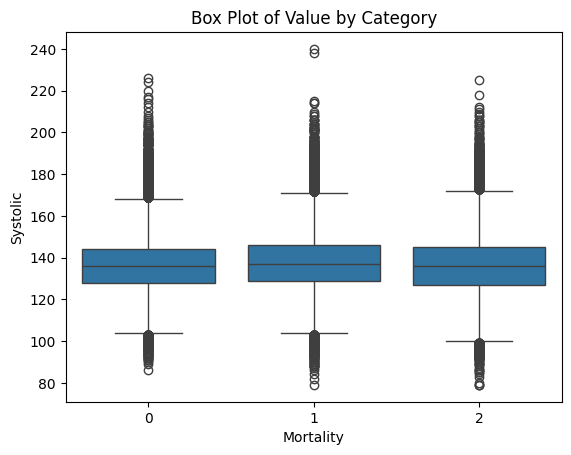

In [17]:
sns.boxplot(x='mortality', y='SYSTOLIC', data=data_frame1)

# Add labels and title
plt.xlabel('Mortality')
plt.ylabel('Systolic')
plt.title('Box Plot of Value by Category')

# Show plot
plt.show()

In [18]:
type(data_frame1['SYSTOLIC'])

pandas.core.series.Series

In [19]:
data_frame1.shape

(270540, 71)

In [20]:
data_frame1['SYSTOLIC'].unique()

array([100, 152, 128, 141, 148, 124, 134, 167, 178, 129, 136, 142, 182,
       183, 147, 139, 118, 168, 174, 165, 135, 162, 151, 156, 161, 145,
       146, 138, 150, 131, 101, 160, 158, 143, 163, 164, 144, 185, 166,
       120, 153, 157, 154, 102, 149, 132, 169, 192, 184, 137, 180, 133,
       181, 159, 103, 155, 130, 190, 125, 127, 126, 189, 140, 122, 123,
       171, 176, 104, 201, 170, 172, 179, 105, 117, 115, 175, 116, 173,
       106, 112, 204, 119, 110, 193, 177, 107, 109, 186, 121, 108, 195,
       198, 114, 111, 188, 187, 113, 196, 202,  96,  94,  95,  88,  99,
       199, 194,  92,  98,  97,  83, 238, 206, 205, 197, 240,  91,  90,
        79, 208,  86,  93, 191, 215,  89, 226, 200, 203, 207, 209, 210,
       211, 212, 214, 216, 217, 218, 220, 224, 225,  80,  82,  84,  85,
        87], dtype=int64)

In [21]:
# bins = [-np.inf, 119, 129, 139, 179, np.inf] 
# data_frame1['SYSTOLIC'] = data_frame1['SYSTOLIC'].astype(float)
data_frame1['SYSTOLIC']= pd.cut(x=data_frame1['SYSTOLIC'], bins = [0, 119, 129, 139, 179, 200], right=False, labels=["<120", "120-129", "130-139", "140-179", ">=180"], include_lowest=True)



# df['SYSTOLIC'] = pd.cut(x=df['SYSTOLIC'], bins=[-np.inf, 119, 129, 139, 179, np.inf],
#                      right = False, labels=['<120', '120-129', '130-139', '140-179', '>=180'],include_lowest = True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_21844\536542277.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame1['SYSTOLIC']= pd.cut(x=data_frame1['SYSTOLIC'], bins = [0, 119, 129, 139, 179, 200], right=False, labels=["<120", "120-129", "130-139", "140-179", ">=180"], include_lowest=True)


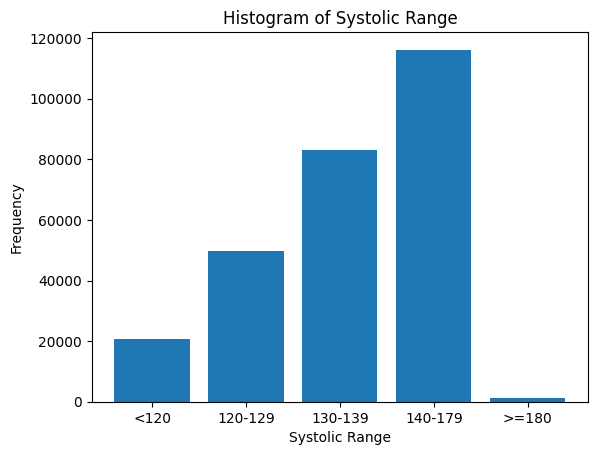

In [22]:
bin_counts = data_frame1['SYSTOLIC'].value_counts().sort_index()
plt.bar(bin_counts.index, bin_counts.values)

# Add labels and title
plt.xlabel('Systolic Range')
plt.ylabel('Frequency')
plt.title('Histogram of Systolic Range')

# Show plot
plt.show()

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


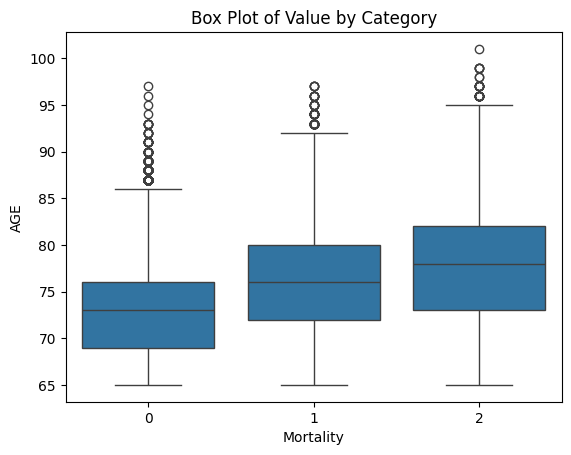

In [23]:
sns.boxplot(x='mortality', y='AGE', data=data_frame1)

# Add labels and title
plt.xlabel('Mortality')
plt.ylabel('AGE')
plt.title('Box Plot of Value by Category')

# Show plot
plt.show()

In [24]:
data_frame1['AGE'] = pd.cut(x=data_frame1['AGE'], bins=[65, 70, 75, 80, 85, 90, 95, 100],
                     right = False, labels=['65-69', '70-74', '75-79',
                            '80-84', '85-89', '90-94', '>=95'],include_lowest = True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_21844\128983413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame1['AGE'] = pd.cut(x=data_frame1['AGE'], bins=[65, 70, 75, 80, 85, 90, 95, 100],


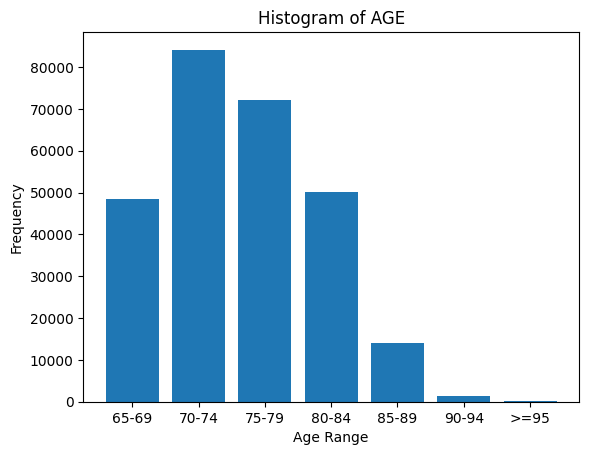

In [25]:
bin_counts = data_frame1['AGE'].value_counts().sort_index()
plt.bar(bin_counts.index, bin_counts.values)

# Add labels and title
plt.xlabel('Age Range')
plt.ylabel('Frequency')
plt.title('Histogram of AGE')

# Show plot
plt.show()

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


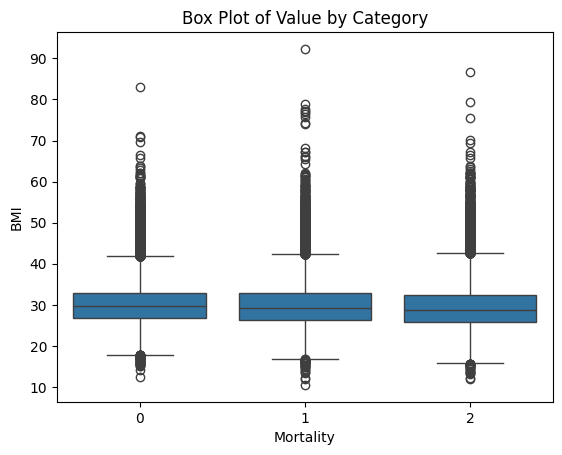

In [26]:
sns.boxplot(x='mortality', y='BMI', data=data_frame1)

# Add labels and title
plt.xlabel('Mortality')
plt.ylabel('BMI')
plt.title('Box Plot of Value by Category')

# Show plot
plt.show()

In [27]:
data_frame1.loc[:, 'BMI'] = pd.cut(x=data_frame1['BMI'], bins=[10, 18.4, 24.9, 39.9, 49.9,
np.inf] ,right = False, labels=['<18.5','18.5-24.9','25-39.9','40-49.9', '>=50' ],include_lowest = True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_21844\1668481151.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['25-39.9', '25-39.9', '25-39.9', '25-39.9', '<18.5', ..., '25-39.9', '25-39.9', '25-39.9', '18.5-24.9', '25-39.9']
Length: 270540
Categories (5, object): ['<18.5' < '18.5-24.9' < '25-39.9' < '40-49.9' < '>=50']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data_frame1.loc[:, 'BMI'] = pd.cut(x=data_frame1['BMI'], bins=[10, 18.4, 24.9, 39.9, 49.9,


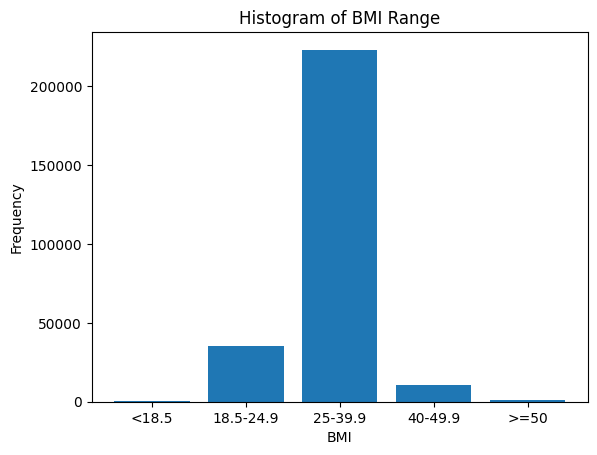

In [28]:
bin_counts = data_frame1['BMI'].value_counts().sort_index()
plt.bar(bin_counts.index, bin_counts.values)

# Add labels and title
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Histogram of BMI Range')

# Show plot
plt.show()

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


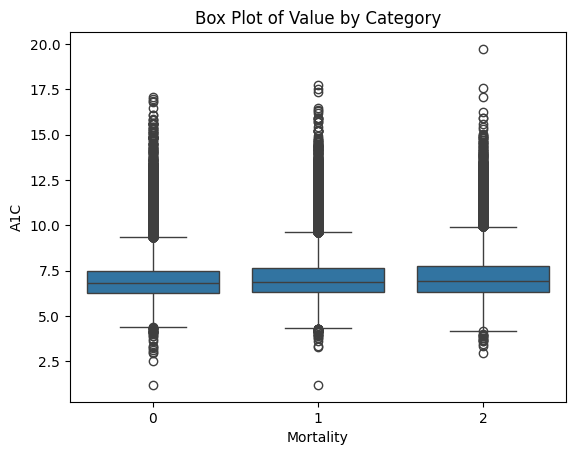

In [29]:
sns.boxplot(x='mortality', y='A1C', data=data_frame1)

# Add labels and title
plt.xlabel('Mortality')
plt.ylabel('A1C')
plt.title('Box Plot of Value by Category')

# Show plot
plt.show()

In [30]:

data_frame1['A1C']= pd.cut(x=data_frame1['A1C'], bins = [-np.inf, 7.9, 9.0, np.inf] , right=False, labels=["<8", "8-9", ">9" ], include_lowest=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_21844\3766683447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame1['A1C']= pd.cut(x=data_frame1['A1C'], bins = [-np.inf, 7.9, 9.0, np.inf] , right=False, labels=["<8", "8-9", ">9" ], include_lowest=True)


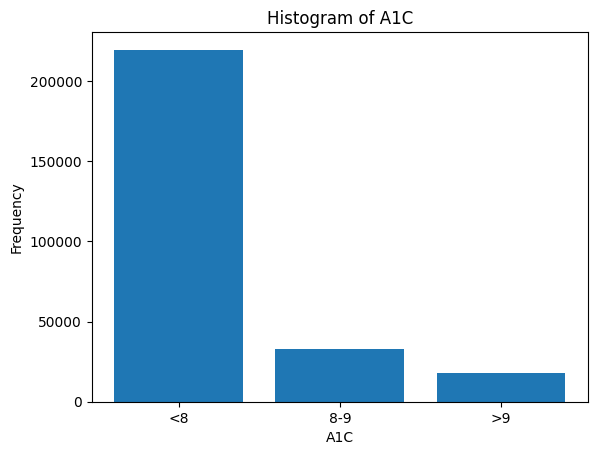

In [31]:
bin_counts = data_frame1['A1C'].value_counts().sort_index()
plt.bar(bin_counts.index, bin_counts.values)

# Add labels and title
plt.xlabel('A1C')
plt.ylabel('Frequency')
plt.title('Histogram of A1C')

# Show plot
plt.show()

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


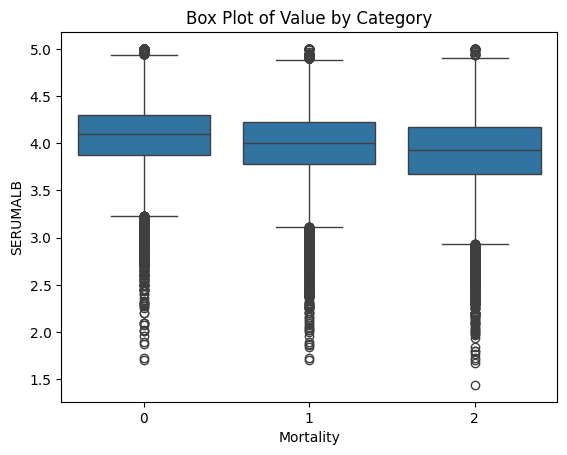

In [32]:
sns.boxplot(x='mortality', y='SERUMALB', data=data_frame1)

# Add labels and title
plt.xlabel('Mortality')
plt.ylabel('SERUMALB')
plt.title('Box Plot of Value by Category')

# Show plot
plt.show()

In [33]:

data_frame1['SERUMALB']= pd.cut(x=data_frame1['SERUMALB'], bins = [-np.inf, 3.49, np.inf] , right=False, labels=["<3.5", ">=3.5" ], include_lowest=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_21844\1950015680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame1['SERUMALB']= pd.cut(x=data_frame1['SERUMALB'], bins = [-np.inf, 3.49, np.inf] , right=False, labels=["<3.5", ">=3.5" ], include_lowest=True)


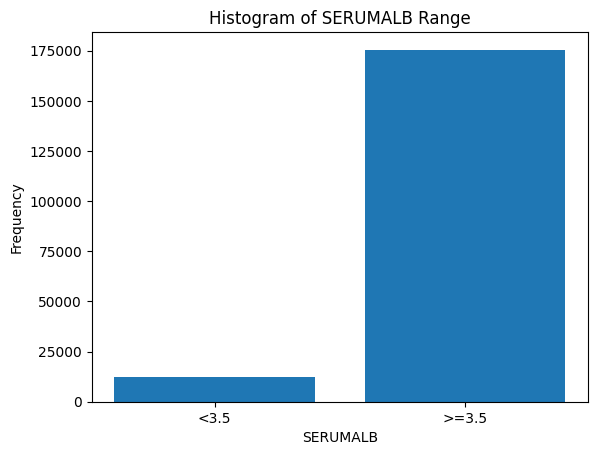

In [34]:
bin_counts = data_frame1['SERUMALB'].value_counts().sort_index()
plt.bar(bin_counts.index, bin_counts.values)

# Add labels and title
plt.xlabel('SERUMALB')
plt.ylabel('Frequency')
plt.title('Histogram of SERUMALB Range')

# Show plot
plt.show()

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


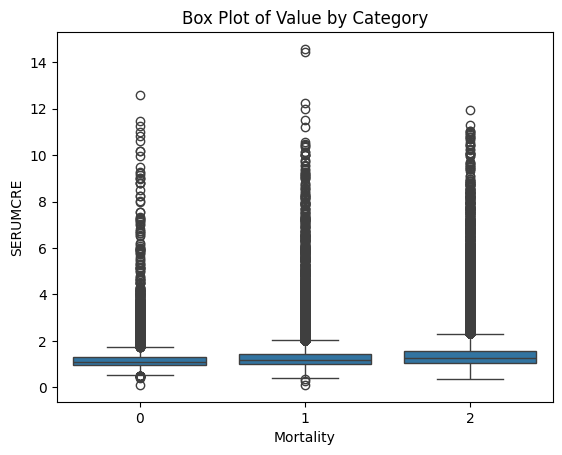

In [35]:
sns.boxplot(x='mortality', y='SERUMCRE', data=data_frame1)

# Add labels and title
plt.xlabel('Mortality')
plt.ylabel('SERUMCRE')
plt.title('Box Plot of Value by Category')

# Show plot
plt.show()

In [36]:

data_frame1['SERUMCRE']= pd.cut(x=data_frame1['SERUMCRE'], bins = [-np.inf, 1.49, 3.00, np.inf] , right=False, labels=["<1.5", "1.5-3.0", ">3.0"], include_lowest=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_21844\1197136175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame1['SERUMCRE']= pd.cut(x=data_frame1['SERUMCRE'], bins = [-np.inf, 1.49, 3.00, np.inf] , right=False, labels=["<1.5", "1.5-3.0", ">3.0"], include_lowest=True)


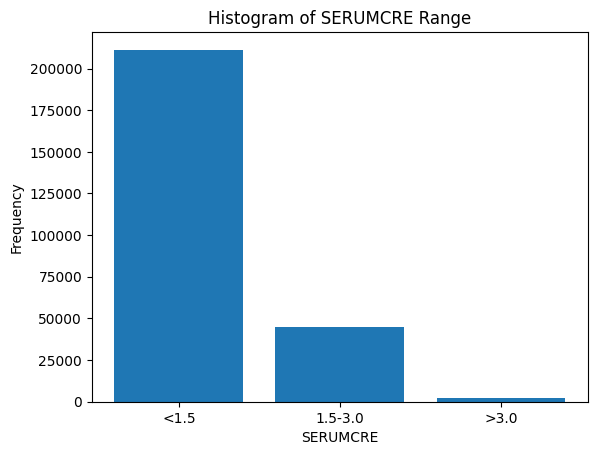

In [37]:
bin_counts = data_frame1['SERUMCRE'].value_counts().sort_index()
plt.bar(bin_counts.index, bin_counts.values)

# Add labels and title
plt.xlabel('SERUMCRE')
plt.ylabel('Frequency')
plt.title('Histogram of SERUMCRE Range')

# Show plot
plt.show()

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


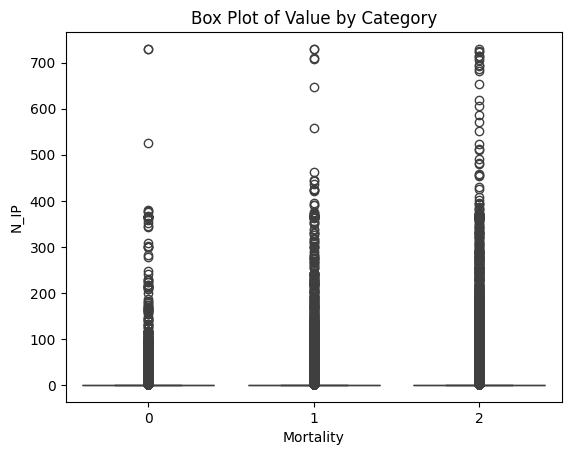

In [38]:
sns.boxplot(x='mortality', y='N_IP', data=data_frame1)

# Add labels and title
plt.xlabel('Mortality')
plt.ylabel('N_IP')
plt.title('Box Plot of Value by Category')

# Show plot
plt.show()

In [39]:

data_frame1['N_IP']= pd.cut(x=data_frame1['N_IP'], bins = [0, 5, np.inf]  , right=False, labels=["0-5", ">5"  ], include_lowest=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_21844\2564517708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame1['N_IP']= pd.cut(x=data_frame1['N_IP'], bins = [0, 5, np.inf]  , right=False, labels=["0-5", ">5"  ], include_lowest=True)


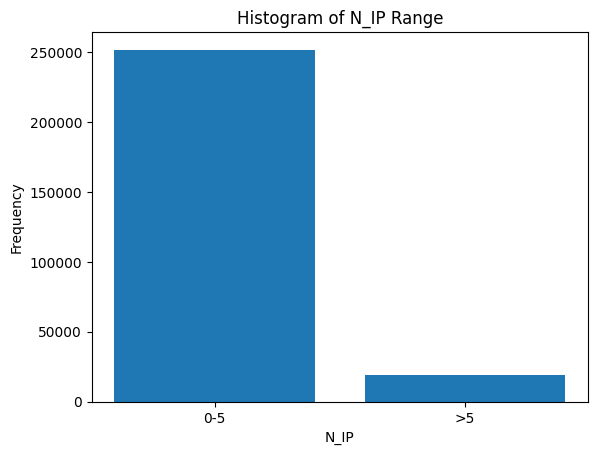

In [40]:
bin_counts = data_frame1['N_IP'].value_counts().sort_index()
plt.bar(bin_counts.index, bin_counts.values)

# Add labels and title
plt.xlabel('N_IP')
plt.ylabel('Frequency')
plt.title('Histogram of N_IP Range')

# Show plot
plt.show()

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


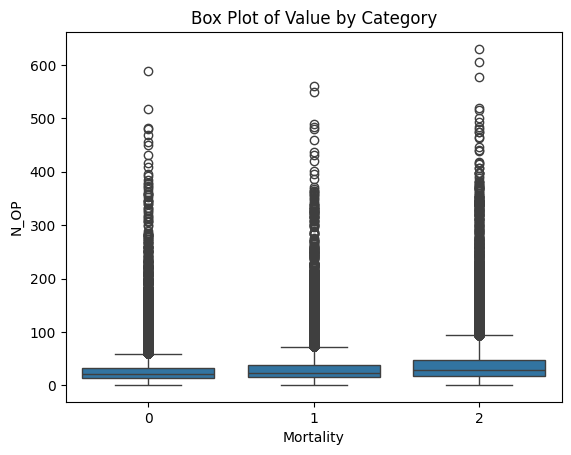

In [41]:
sns.boxplot(x='mortality', y='N_OP', data=data_frame1)

# Add labels and title
plt.xlabel('Mortality')
plt.ylabel('N_OP')
plt.title('Box Plot of Value by Category')

# Show plot
plt.show()

In [42]:

data_frame1['N_OP']= pd.cut(x=data_frame1['N_OP'], bins = [0, 5, 30, np.inf] , right=False, labels=["0-5", "6-30", ">30" ], include_lowest=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_21844\2662976441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame1['N_OP']= pd.cut(x=data_frame1['N_OP'], bins = [0, 5, 30, np.inf] , right=False, labels=["0-5", "6-30", ">30" ], include_lowest=True)


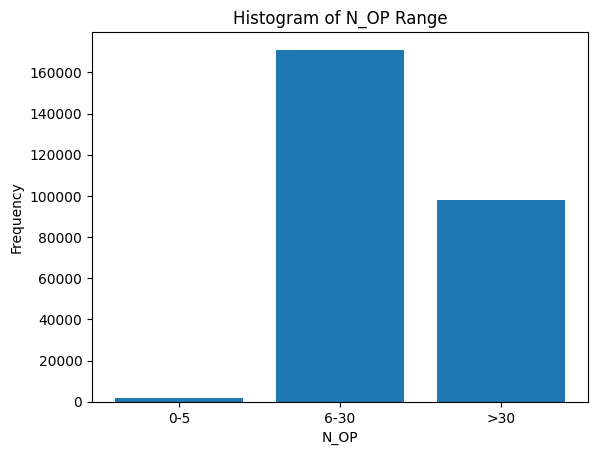

In [43]:
bin_counts = data_frame1['N_OP'].value_counts().sort_index()
plt.bar(bin_counts.index, bin_counts.values)

# Add labels and title
plt.xlabel('N_OP')
plt.ylabel('Frequency')
plt.title('Histogram of N_OP Range')

# Show plot
plt.show()

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


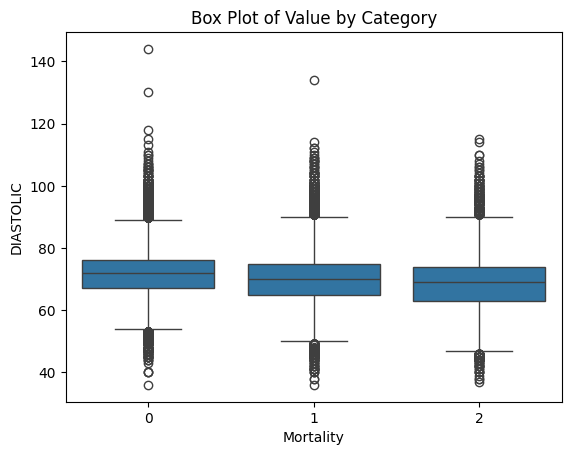

In [44]:
sns.boxplot(x='mortality', y='DIASTOLIC', data=data_frame1)

# Add labels and title
plt.xlabel('Mortality')
plt.ylabel('DIASTOLIC')
plt.title('Box Plot of Value by Category')

# Show plot
plt.show()

In [45]:

data_frame1['DIASTOLIC']= pd.cut(x=data_frame1['DIASTOLIC'], bins = [-np.inf, 79, 89, np.inf] , right=False, labels=["<80", "80-89", ">=90"], include_lowest=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_21844\550791301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame1['DIASTOLIC']= pd.cut(x=data_frame1['DIASTOLIC'], bins = [-np.inf, 79, 89, np.inf] , right=False, labels=["<80", "80-89", ">=90"], include_lowest=True)


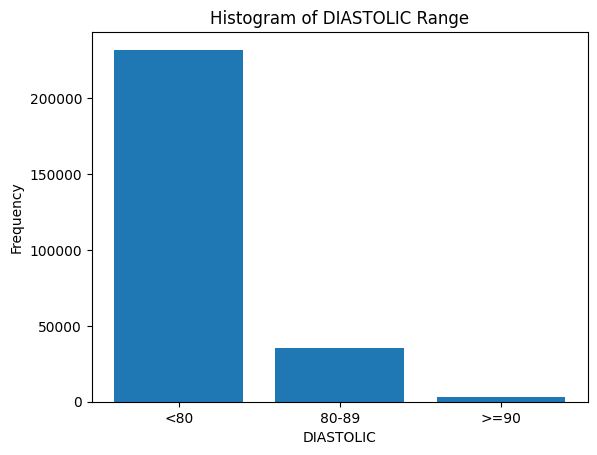

In [46]:
bin_counts = data_frame1['DIASTOLIC'].value_counts().sort_index()
plt.bar(bin_counts.index, bin_counts.values)

# Add labels and title
plt.xlabel('DIASTOLIC')
plt.ylabel('Frequency')
plt.title('Histogram of DIASTOLIC Range')

# Show plot
plt.show()

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


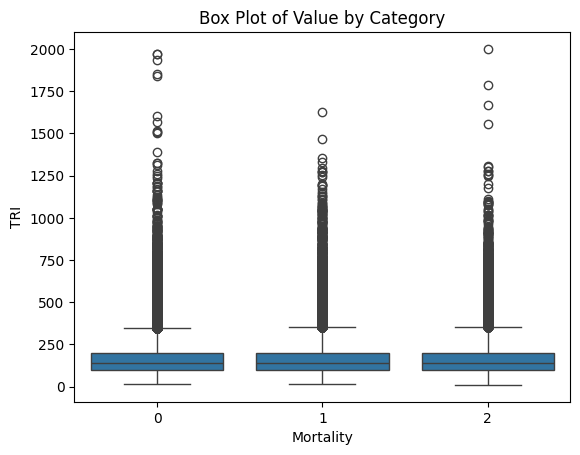

In [47]:
sns.boxplot(x='mortality', y='TRI', data=data_frame1)

# Add labels and title
plt.xlabel('Mortality')
plt.ylabel('TRI')
plt.title('Box Plot of Value by Category')

# Show plot
plt.show()

In [48]:

data_frame1['TRI']= pd.cut(x=data_frame1['TRI'], bins = [-np.inf, 149.99, 199.99, np.inf] , right=False, labels=["<150", "150-199.99", ">=200"], include_lowest=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_21844\2762198189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame1['TRI']= pd.cut(x=data_frame1['TRI'], bins = [-np.inf, 149.99, 199.99, np.inf] , right=False, labels=["<150", "150-199.99", ">=200"], include_lowest=True)


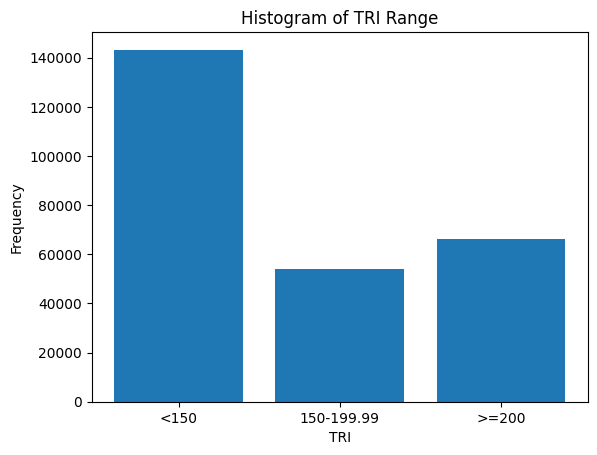

In [49]:
bin_counts = data_frame1['TRI'].value_counts().sort_index()
plt.bar(bin_counts.index, bin_counts.values)

# Add labels and title
plt.xlabel('TRI')
plt.ylabel('Frequency')
plt.title('Histogram of TRI Range')

# Show plot
plt.show()

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


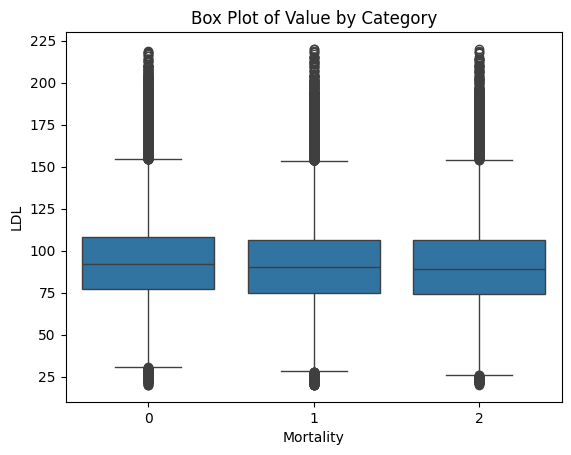

In [50]:
sns.boxplot(x='mortality', y='LDL', data=data_frame1)

# Add labels and title
plt.xlabel('Mortality')
plt.ylabel('LDL')
plt.title('Box Plot of Value by Category')

# Show plot
plt.show()

In [51]:

data_frame1['LDL']= pd.cut(x=data_frame1['LDL'], bins = [-np.inf, 99.99, 129.99, 159.99, 189.99, np.inf] , right=False, labels=["<100", "100-129.99","130-159.99","160-189.99",">=190"], include_lowest=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_21844\2559718320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame1['LDL']= pd.cut(x=data_frame1['LDL'], bins = [-np.inf, 99.99, 129.99, 159.99, 189.99, np.inf] , right=False, labels=["<100", "100-129.99","130-159.99","160-189.99",">=190"], include_lowest=True)


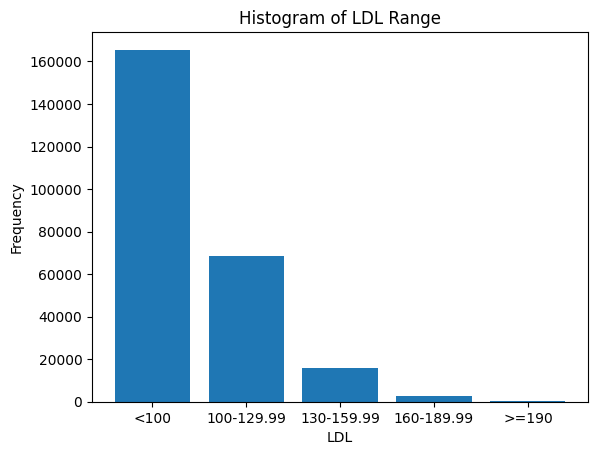

In [52]:
bin_counts = data_frame1['LDL'].value_counts().sort_index()
plt.bar(bin_counts.index, bin_counts.values)

# Add labels and title
plt.xlabel('LDL')
plt.ylabel('Frequency')
plt.title('Histogram of LDL Range')

# Show plot
plt.show()

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


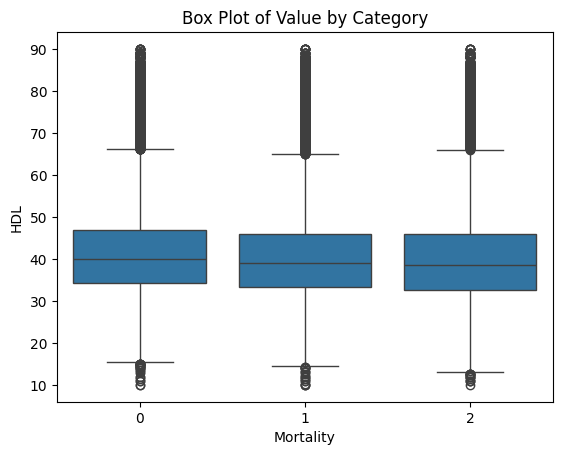

In [53]:
sns.boxplot(x='mortality', y='HDL', data=data_frame1)

# Add labels and title
plt.xlabel('Mortality')
plt.ylabel('HDL')
plt.title('Box Plot of Value by Category')

# Show plot
plt.show()

In [54]:

data_frame1['HDL']= pd.cut(x=data_frame1['HDL'], bins = [-np.inf, 39.99, 59.99, np.inf] , right=False, labels=["<40", "40-59.99", ">=60" ], include_lowest=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_21844\2634822138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame1['HDL']= pd.cut(x=data_frame1['HDL'], bins = [-np.inf, 39.99, 59.99, np.inf] , right=False, labels=["<40", "40-59.99", ">=60" ], include_lowest=True)


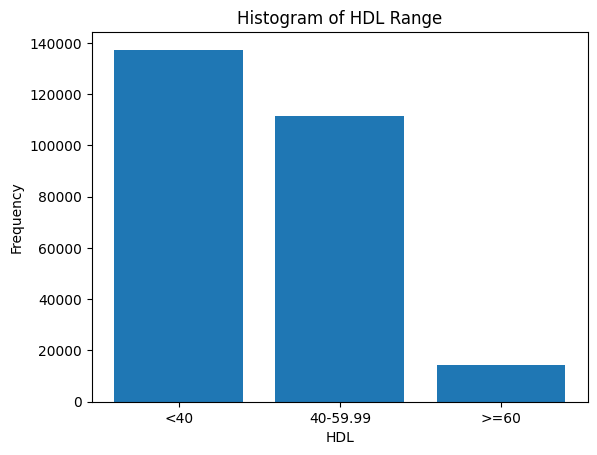

In [55]:
bin_counts = data_frame1['HDL'].value_counts().sort_index()
plt.bar(bin_counts.index, bin_counts.values)

# Add labels and title
plt.xlabel('HDL')
plt.ylabel('Frequency')
plt.title('Histogram of HDL Range')

# Show plot
plt.show()

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


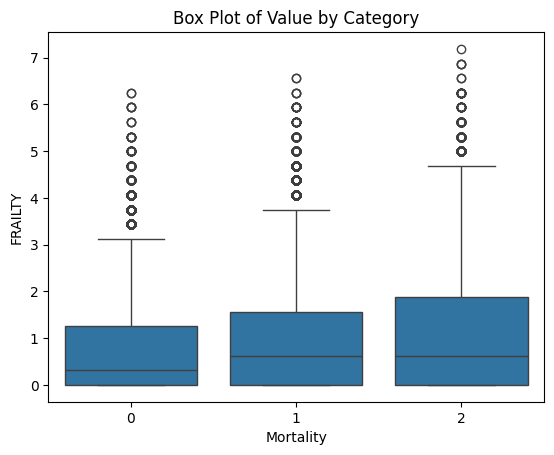

In [56]:
sns.boxplot(x='mortality', y='FRAILTY', data=data_frame1)

# Add labels and title
plt.xlabel('Mortality')
plt.ylabel('FRAILTY')
plt.title('Box Plot of Value by Category')

# Show plot
plt.show()

In [57]:

data_frame1['FRAILTY']= pd.cut(x=data_frame1['FRAILTY'], bins = [0.00, 0.10, 0.20, 0.30, 0.40,np.inf] , right=False, labels=["Non-frail", "Pre-frail", "Mild", "Moderate", "Severe"], include_lowest=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_21844\2889323672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame1['FRAILTY']= pd.cut(x=data_frame1['FRAILTY'], bins = [0.00, 0.10, 0.20, 0.30, 0.40,np.inf] , right=False, labels=["Non-frail", "Pre-frail", "Mild", "Moderate", "Severe"], include_lowest=True)


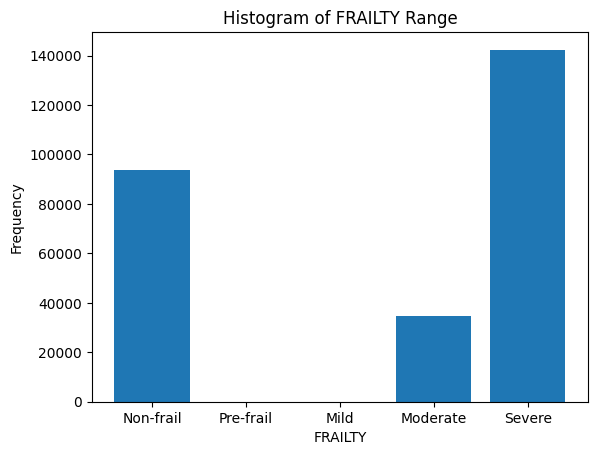

In [58]:
bin_counts = data_frame1['FRAILTY'].value_counts().sort_index()
plt.bar(bin_counts.index, bin_counts.values)

# Add labels and title
plt.xlabel('FRAILTY')
plt.ylabel('Frequency')
plt.title('Histogram of FRAILTY Range')

# Show plot
plt.show()

In [59]:
data_frame1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270540 entries, 0 to 275189
Data columns (total 71 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   SYSTOLIC     270460 non-null  category
 1   A1C          270540 non-null  category
 2   PRIORITY     270540 non-null  object  
 3   AGE          270539 non-null  category
 4   BMI          270540 non-null  category
 5   MARRIED      270540 non-null  object  
 6   HDL          262908 non-null  category
 7   LDL          253522 non-null  category
 8   DIASTOLIC    270540 non-null  category
 9   TRI          263329 non-null  category
 10  SERUMCRE     258864 non-null  category
 11  MICROALB     70085 non-null   float64 
 12  SERUMALB     188028 non-null  category
 13  N_IP         270540 non-null  category
 14  N_OP         270540 non-null  category
 15  INSULIN      270540 non-null  int64   
 16  SULF         270540 non-null  int64   
 17  OTHER_MED    270540 non-null  int64   
 18  BIGUAN   

In [60]:
null_count = data_frame1.isnull().sum()
pd.set_option('display.max_rows', 70)
print(null_count.sort_values(ascending=False))

MICROALB       200455
SERUMALB        82512
LDL             17018
SERUMCRE        11676
HDL              7632
                ...  
NEUROOTHER          0
PULMONARY           0
A1C                 0
HYPOTHYROID         0
mortality           0
Length: 71, dtype: int64


# Handling Null values

In [61]:
data_frame1.drop('MICROALB', axis=1)

,SYSTOLIC,A1C,PRIORITY,AGE,BMI,MARRIED,HDL,LDL,DIASTOLIC,TRI,SERUMCRE,SERUMALB,N_IP,N_OP,INSULIN,SULF,OTHER_MED,BIGUAN,TZD,ALPHA,SEX,RACE,DEATH_5,DEATH_10,CHF,ARRHYTHMIA,VALVULAR,PHTN,PVD,HTN,HTNCX,PARALYSIS,NEUROOTHER,PULMONARY,DMCX,HYPOTHYROID,RENAL,LIVER,PUD,HIV,LYMPHOMA,METS,TUMOR,RHEUMATIC,COAG,OBESITY,WEIGHTLOSS,FLUIDSLYTES,BLOODLOSS,ANEMIA,ALCOHOL,DRUGS,PSYCHOSES,DEPRESSION,SEVERE_DEP,CAD,AMI,RETINOPATHY,HYPERG,ABI,RETSCREEN,CABG,PCI,SMOKER,ESLD,FEET,AMPUTATION,FRAILTY,BP_RX,mortality
0,<120,>9,GROUP 5,75-79,25-39.9,MARRIED,<40,<100,<80,>=200,<1.5,>=3.5,0-5,6-30,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Non-frail,1,2
1,<120,>9,GROUP 5,85-89,25-39.9,MARRIED,<40,<100,<80,<150,NaN,>=3.5,0-5,>30,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Severe,1,1
2,<120,>9,GROUP 3,75-79,25-39.9,SINGLE,<40,100-129.99,<80,<150,1.5-3.0,>=3.5,0-5,6-30,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Severe,0,1
3,<120,>9,GROUP 5,75-79,25-39.9,WIDOWED,<40,<100,<80,150-199.99,<1.5,NaN,0-5,>30,1,0,0,0,0,0,1,3,0,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Severe,1,1
4,<120,<8,GROUP 1,70-74,<18.5,MARRIED,>=60,NaN,<80,<150,<1.5,NaN,0-5,6-30,0,1,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Moderate,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275185,<120,8-9,GROUP 4,85-89,25-39.9,MARRIED,<40,<100,<80,<150,1.5-3.0,NaN,0-5,6-30,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,Severe,1,2
275186,<120,8-9,GROUP 5,70-74,25-39.9,SINGLE,<40,<100,<80,>=200,<1.5,NaN,0-5,6-30,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Non-frail,1,1
275187,<120,>9,GROUP 8,70-74,25-39.9,MARRIED,<40,<100,<80,<150,NaN,NaN,0-5,6-30,1,0,0,0,0,0,1,1,1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Severe,1,2
275188,<120,<8,GROUP 8,70-74,18.5-24.9,MARRIED,40-59.99,<100,<80,<150,<1.5,>=3.5,0-5,6-30,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Severe,1,0


In [62]:
data_frame1['LDL'] = data_frame1['LDL'].cat.add_categories('Missing')

data_frame1['HDL'] = data_frame1['HDL'].cat.add_categories('Missing')

data_frame1['SERUMALB'] = data_frame1['SERUMALB'].cat.add_categories('Missing')

data_frame1['TRI'] = data_frame1['TRI'].cat.add_categories('Missing')

data_frame1['SERUMCRE'] = data_frame1['SERUMCRE'].cat.add_categories('Missing')


# LDL "<100", "100-129.99","130-159.99","160-189.99",">=190"
# HDL "<40", "40-59.99", ">=60"
# SERUMALB "<3.5", ">=3.5"
# TRI "<150", "150-199.99", ">=200"
# SERUMCRE"<1.5", "1.5-3.0", ">3.0"
data_frame1['LDL'].unique()


C:\Users\Admin\AppData\Local\Temp\ipykernel_21844\833973906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame1['LDL'] = data_frame1['LDL'].cat.add_categories('Missing')
C:\Users\Admin\AppData\Local\Temp\ipykernel_21844\833973906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame1['HDL'] = data_frame1['HDL'].cat.add_categories('Missing')
C:\Users\Admin\AppData\Local\Temp\ipykernel_21844\833973906.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

['<100', '100-129.99', NaN, '130-159.99', '160-189.99', '>=190']
Categories (6, object): ['<100' < '100-129.99' < '130-159.99' < '160-189.99' < '>=190' < 'Missing']

In [63]:
data_frame1['HDL'].unique()

['<40', '>=60', '40-59.99', NaN]
Categories (4, object): ['<40' < '40-59.99' < '>=60' < 'Missing']

In [64]:
data_frame1['LDL'] = data_frame1['LDL'].fillna('Missing')
data_frame1['HDL'] = data_frame1['HDL'].fillna('Missing')
data_frame1['SERUMALB'] = data_frame1['SERUMALB'].fillna('Missing')
data_frame1['TRI'] = data_frame1['TRI'].fillna('Missing')
data_frame1['SERUMCRE'] = data_frame1['SERUMCRE'].fillna('Missing')

C:\Users\Admin\AppData\Local\Temp\ipykernel_21844\630180485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame1['LDL'] = data_frame1['LDL'].fillna('Missing')
C:\Users\Admin\AppData\Local\Temp\ipykernel_21844\630180485.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame1['HDL'] = data_frame1['HDL'].fillna('Missing')
C:\Users\Admin\AppData\Local\Temp\ipykernel_21844\630180485.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [65]:
null_count = data_frame1.isnull().sum()
pd.set_option('display.max_rows', 70)
print(null_count.sort_values(ascending=False))

MICROALB      200455
SYSTOLIC          80
AGE                1
OBESITY            0
DRUGS              0
               ...  
HTNCX              0
PARALYSIS          0
NEUROOTHER         0
PULMONARY          0
mortality          0
Length: 71, dtype: int64


In [66]:
data_frame1 = data_frame1.drop('MICROALB', axis=1)

In [67]:
data_frame1.shape

(270540, 70)

In [68]:
null_count = data_frame1.isnull().sum()
pd.set_option('display.max_rows', 70)
print(null_count.sort_values(ascending=False))

SYSTOLIC       80
AGE             1
OBESITY         0
DRUGS           0
ALCOHOL         0
ANEMIA          0
BLOODLOSS       0
FLUIDSLYTES     0
WEIGHTLOSS      0
COAG            0
DEPRESSION      0
RHEUMATIC       0
TUMOR           0
METS            0
LYMPHOMA        0
HIV             0
PUD             0
PSYCHOSES       0
SEVERE_DEP      0
RENAL           0
CAD             0
AMI             0
RETINOPATHY     0
HYPERG          0
ABI             0
RETSCREEN       0
CABG            0
PCI             0
SMOKER          0
ESLD            0
FEET            0
AMPUTATION      0
FRAILTY         0
BP_RX           0
LIVER           0
HYPOTHYROID     0
A1C             0
SERUMCRE        0
OTHER_MED       0
SULF            0
INSULIN         0
N_OP            0
N_IP            0
SERUMALB        0
TRI             0
DMCX            0
DIASTOLIC       0
LDL             0
HDL             0
MARRIED         0
BMI             0
PRIORITY        0
BIGUAN          0
TZD             0
ALPHA           0
SEX       

# DECODING VARIABLES

In [69]:
dict_race = {1: "White",
            2: "Black",
            3: "Other"}

data_frame1['RACE'] = data_frame1['RACE'].replace(dict_race)
print(data_frame1.head())

  SYSTOLIC A1C PRIORITY    AGE      BMI  MARRIED   HDL         LDL DIASTOLIC  \
0     <120  >9  GROUP 5  75-79  25-39.9  MARRIED   <40        <100       <80   
1     <120  >9  GROUP 5  85-89  25-39.9  MARRIED   <40        <100       <80   
2     <120  >9  GROUP 3  75-79  25-39.9   SINGLE   <40  100-129.99       <80   
3     <120  >9  GROUP 5  75-79  25-39.9  WIDOWED   <40        <100       <80   
4     <120  <8  GROUP 1  70-74    <18.5  MARRIED  >=60     Missing       <80   

          TRI SERUMCRE SERUMALB N_IP  N_OP  INSULIN  SULF  OTHER_MED  BIGUAN  \
0       >=200     <1.5    >=3.5  0-5  6-30        0     0          0       0   
1        <150  Missing    >=3.5  0-5   >30        0     1          0       1   
2        <150  1.5-3.0    >=3.5  0-5  6-30        0     0          0       0   
3  150-199.99     <1.5  Missing  0-5   >30        1     0          0       0   
4        <150     <1.5  Missing  0-5  6-30        0     1          0       0   

   TZD  ALPHA  SEX   RACE  DEATH_5  DE

In [70]:
data_frame1.to_csv('cleaned_data.csv', index= False)

In [71]:
for col in data_frame1.columns:
    print("##########")
    print(data_frame1[col].value_counts())
    print("##########")

##########
SYSTOLIC
140-179    116186
130-139     82980
120-129     49616
<120        20612
>=180        1066
Name: count, dtype: int64
##########
##########
A1C
<8     219419
8-9     33002
>9      18119
Name: count, dtype: int64
##########
##########
PRIORITY
GROUP 5    103303
GROUP 8     93692
GROUP 1     25850
GROUP 3     19951
GROUP 2     10293
GROUP 7     10233
GROUP 4      6057
GROUP 6      1075
Unknown        86
Name: count, dtype: int64
##########
##########
AGE
70-74    84165
75-79    72235
80-84    50161
65-69    48557
85-89    14016
90-94     1329
>=95        76
Name: count, dtype: int64
##########
##########
BMI
25-39.9      223333
18.5-24.9     35386
40-49.9       10548
>=50            843
<18.5           430
Name: count, dtype: int64
##########
##########
MARRIED
MARRIED    175836
WIDOWED     52336
SINGLE      42368
Name: count, dtype: int64
##########
##########
HDL
<40         137314
40-59.99    111451
>=60         14143
Missing       7632
Name: count, dtype: int64
####

# Train test split

In [72]:
features = data_frame1.drop(columns=['DEATH_5','DEATH_10','mortality'],axis=1)
labels = data_frame1['mortality']

In [73]:
features.shape

(270540, 67)

In [74]:
X_train,X_test,y_train,y_test = train_test_split(features,labels,test_size=0.25,shuffle=True,stratify=labels)

In [75]:
type(X_train)

pandas.core.frame.DataFrame

In [76]:
training_data = pd.concat([X_train,y_train],axis=1)
test_data = pd.concat([X_test,y_test],axis=1)

In [77]:
training_data.to_csv('train.csv', index= False)
test_data.to_csv('test.csv', index= False)

# chi2 test

# DUMMY ENCODING

In [78]:
training_data= training_data.drop(columns=['RACE','SEX','FRAILTY'])
test_data=test_data.drop(columns=['RACE','SEX','FRAILTY'])

In [79]:
categorical = training_data.select_dtypes(include = ['object','category'])
print(categorical)

       SYSTOLIC A1C PRIORITY    AGE        BMI  MARRIED       HDL         LDL  \
108644  130-139  <8  GROUP 7  75-79  18.5-24.9  MARRIED       <40        <100   
272455     <120  <8  GROUP 5  70-74    25-39.9  MARRIED       <40  100-129.99   
113631  130-139  <8  GROUP 8  75-79    25-39.9  MARRIED  40-59.99  100-129.99   
18236      <120  <8  GROUP 5  80-84    25-39.9  MARRIED       <40        <100   
250543  140-179  >9  GROUP 5  80-84    40-49.9  MARRIED       <40        <100   
...         ...  ..      ...    ...        ...      ...       ...         ...   
78011   130-139  >9  GROUP 8  90-94  18.5-24.9  WIDOWED  40-59.99        <100   
65160   120-129  <8  GROUP 5  70-74  18.5-24.9  MARRIED  40-59.99        <100   
82758   130-139  <8  GROUP 8  70-74    25-39.9  MARRIED       <40  100-129.99   
158976  140-179  <8  GROUP 8  65-69    40-49.9  WIDOWED       <40        <100   
162419  130-139  >9  GROUP 8  65-69    25-39.9  MARRIED       <40        <100   

       DIASTOLIC         TR

In [80]:
print(categorical.columns.to_list())

['SYSTOLIC', 'A1C', 'PRIORITY', 'AGE', 'BMI', 'MARRIED', 'HDL', 'LDL', 'DIASTOLIC', 'TRI', 'SERUMCRE', 'SERUMALB', 'N_IP', 'N_OP']


In [81]:
training_data = pd.get_dummies(training_data, columns=categorical.columns.to_list())
training_data.shape

(202905, 112)

In [82]:
category = training_data.select_dtypes(include = 'bool').columns
print(category)

Index(['SYSTOLIC_<120', 'SYSTOLIC_120-129', 'SYSTOLIC_130-139',
       'SYSTOLIC_140-179', 'SYSTOLIC_>=180', 'A1C_<8', 'A1C_8-9', 'A1C_>9',
       'PRIORITY_GROUP 1', 'PRIORITY_GROUP 2', 'PRIORITY_GROUP 3',
       'PRIORITY_GROUP 4', 'PRIORITY_GROUP 5', 'PRIORITY_GROUP 6',
       'PRIORITY_GROUP 7', 'PRIORITY_GROUP 8', 'PRIORITY_Unknown', 'AGE_65-69',
       'AGE_70-74', 'AGE_75-79', 'AGE_80-84', 'AGE_85-89', 'AGE_90-94',
       'AGE_>=95', 'BMI_<18.5', 'BMI_18.5-24.9', 'BMI_25-39.9', 'BMI_40-49.9',
       'BMI_>=50', 'MARRIED_MARRIED', 'MARRIED_SINGLE', 'MARRIED_WIDOWED',
       'HDL_<40', 'HDL_40-59.99', 'HDL_>=60', 'HDL_Missing', 'LDL_<100',
       'LDL_100-129.99', 'LDL_130-159.99', 'LDL_160-189.99', 'LDL_>=190',
       'LDL_Missing', 'DIASTOLIC_<80', 'DIASTOLIC_80-89', 'DIASTOLIC_>=90',
       'TRI_<150', 'TRI_150-199.99', 'TRI_>=200', 'TRI_Missing',
       'SERUMCRE_<1.5', 'SERUMCRE_1.5-3.0', 'SERUMCRE_>3.0',
       'SERUMCRE_Missing', 'SERUMALB_<3.5', 'SERUMALB_>=3.5',
       'S

In [83]:
training_data.to_csv('train_encoded.csv', index= False)

In [84]:
for col in training_data.columns:
    print("##########")
    print(training_data[col].value_counts())
    print("##########")

##########
INSULIN
0    171258
1     31647
Name: count, dtype: int64
##########
##########
SULF
0    111326
1     91579
Name: count, dtype: int64
##########
##########
OTHER_MED
0    202611
1       294
Name: count, dtype: int64
##########
##########
BIGUAN
0    118095
1     84810
Name: count, dtype: int64
##########
##########
TZD
0    182557
1     20348
Name: count, dtype: int64
##########
##########
ALPHA
0    200592
1      2313
Name: count, dtype: int64
##########
##########
CHF
0    164641
1     38264
Name: count, dtype: int64
##########
##########
ARRHYTHMIA
0    149732
1     53173
Name: count, dtype: int64
##########
##########
VALVULAR
0    177711
1     25194
Name: count, dtype: int64
##########
##########
PHTN
0    198083
1      4822
Name: count, dtype: int64
##########
##########
PVD
0    156978
1     45927
Name: count, dtype: int64
##########
##########
HTN
1    185645
0     17260
Name: count, dtype: int64
##########
##########
HTNCX
0    181473
1     21432
Name: count, dtype

In [85]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202905 entries, 108644 to 162419
Columns: 112 entries, INSULIN to N_OP_>30
dtypes: bool(61), int64(51)
memory usage: 92.3 MB


In [86]:
training_data.select_dtypes(include = 'number').columns


Index(['INSULIN', 'SULF', 'OTHER_MED', 'BIGUAN', 'TZD', 'ALPHA', 'CHF',
       'ARRHYTHMIA', 'VALVULAR', 'PHTN', 'PVD', 'HTN', 'HTNCX', 'PARALYSIS',
       'NEUROOTHER', 'PULMONARY', 'DMCX', 'HYPOTHYROID', 'RENAL', 'LIVER',
       'PUD', 'HIV', 'LYMPHOMA', 'METS', 'TUMOR', 'RHEUMATIC', 'COAG',
       'OBESITY', 'WEIGHTLOSS', 'FLUIDSLYTES', 'BLOODLOSS', 'ANEMIA',
       'ALCOHOL', 'DRUGS', 'PSYCHOSES', 'DEPRESSION', 'SEVERE_DEP', 'CAD',
       'AMI', 'RETINOPATHY', 'HYPERG', 'ABI', 'RETSCREEN', 'CABG', 'PCI',
       'SMOKER', 'ESLD', 'FEET', 'AMPUTATION', 'BP_RX', 'mortality'],
      dtype='object')

In [87]:
variables = training_data.select_dtypes(include='bool').columns
correlation_table = pd.DataFrame(columns=['Columnname','Point Biserial corr','p value','chi squared','p value','Degree of Freedom'])
# Iterate over all combinations of categorical columns
for col in variables:
        # Create a contingency table for the combination of columns i and j
        contingency_table = pd.crosstab(index=training_data[col], columns=training_data['mortality'])
        point_biserial_corr, p_value = pointbiserialr(training_data[col], training_data['mortality'])
        # Perform the chi-square test for the contingency table
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        correlation_table.loc[len(correlation_table)] = [col, point_biserial_corr, p_value, chi2, p, dof]
        # correlation_table = correlation_table.concat({'Columnname': col,
        #                                           'Point Biserial corr': point_biserial_corr,
        #                                           'p value': p_value,
        #                                           'chi squared': chi2,
        #                                           'p value chi2': p,
        #                                           'Degree of Freedom': dof},
        #                                          ignore_index=True)
        # Print the results
        # print(f"Chi-square test for {col}")
        # print("Chi-square statistic:", chi2)
        # print("P-value:", p)
        # print("Degrees of freedom:", dof)
        # print("Point Biserial correlation:", point_biserial_corr)

In [88]:
pd.set_option('display.max_rows',120)
correlation_table

,Columnname,Point Biserial corr,p value,chi squared,p value,Degree of Freedom
0,SYSTOLIC_<120,0.039401,1.579234e-70,354.430264,1.087542e-77,2
1,SYSTOLIC_120-129,-0.002870,1.961069e-01,39.829708,2.244341e-09,2
2,SYSTOLIC_130-139,-0.030302,1.943455e-42,207.390381,9.241679e-46,2
3,SYSTOLIC_140-179,0.007370,8.999910e-04,158.089223,4.692037e-35,2
4,SYSTOLIC_>=180,0.014441,7.767961e-11,49.113821,2.163064e-11,2
5,A1C_<8,-0.064984,9.598802e-189,857.392347,6.601115e-187,2
6,A1C_8-9,0.040639,6.458178e-75,336.818278,7.258387e-74,2
7,A1C_>9,0.048583,2.783849e-106,479.213886,8.710174e-105,2
8,PRIORITY_GROUP 1,0.035907,7.060368e-59,261.948790,1.313841e-57,2
9,PRIORITY_GROUP 2,0.006692,2.574602e-03,15.278157,4.812718e-04,2


In [89]:
cols = ['PRIORITY_Unknown',
'MARRIED_MARRIED','N_OP_6-30','BMI_25-39.9','A1C_<8', 'AGE_65-69','N_IP_0-5',
'DIASTOLIC_<80',
'SYSTOLIC_<120', 
'SERUMCRE_<1.5', 
'HDL_40-59.99',
'LDL_<100', 
'TRI_<150', 
'SERUMALB_>=3.5']
count_values = pd.DataFrame(columns=['Columnname','True','False'])

# print(training_data['A1C_<8'].value_counts().get(True,0))
for col in cols:
    count_values.loc[len(count_values)] = [col, training_data[col].value_counts().get(True,0), training_data[col].value_counts().get(False,0)]

In [90]:
print(count_values)

          Columnname    True   False
0   PRIORITY_Unknown      69  202836
1    MARRIED_MARRIED  131935   70970
2          N_OP_6-30  128194   74711
3        BMI_25-39.9  167383   35522
4             A1C_<8  164500   38405
5          AGE_65-69   36169  166736
6           N_IP_0-5  188753   14152
7      DIASTOLIC_<80  173957   28948
8      SYSTOLIC_<120   15486  187419
9      SERUMCRE_<1.5  158702   44203
10      HDL_40-59.99   83629  119276
11          LDL_<100  124219   78686
12          TRI_<150  107599   95306
13    SERUMALB_>=3.5  131601   71304


In [91]:
training_data = training_data.drop(columns= ['PRIORITY_Unknown',
'MARRIED_MARRIED','N_OP_6-30','BMI_25-39.9','A1C_<8', 'AGE_65-69','N_IP_0-5',
'DIASTOLIC_<80',
'SYSTOLIC_<120', 
'SERUMCRE_<1.5', 
'HDL_40-59.99',
'LDL_<100', 
'TRI_<150', 
'SERUMALB_>=3.5'], axis=1)

# CLASS BALANCING

In [92]:
training_data['mortality'].value_counts()

mortality
0    86548
1    68214
2    48143
Name: count, dtype: int64

In [93]:
training_data.shape

(202905, 98)

In [94]:
features = training_data.drop(columns=['mortality'],axis=1)
labels = training_data['mortality']

In [95]:
under_sampler = RandomUnderSampler(random_state=42,sampling_strategy='not minority')
balanced_features, balanced_label = under_sampler.fit_resample(features,labels)

In [96]:
balanced_label.value_counts()

mortality
0    48143
1    48143
2    48143
Name: count, dtype: int64

In [97]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202905 entries, 108644 to 162419
Data columns (total 98 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   INSULIN           202905 non-null  int64
 1   SULF              202905 non-null  int64
 2   OTHER_MED         202905 non-null  int64
 3   BIGUAN            202905 non-null  int64
 4   TZD               202905 non-null  int64
 5   ALPHA             202905 non-null  int64
 6   CHF               202905 non-null  int64
 7   ARRHYTHMIA        202905 non-null  int64
 8   VALVULAR          202905 non-null  int64
 9   PHTN              202905 non-null  int64
 10  PVD               202905 non-null  int64
 11  HTN               202905 non-null  int64
 12  HTNCX             202905 non-null  int64
 13  PARALYSIS         202905 non-null  int64
 14  NEUROOTHER        202905 non-null  int64
 15  PULMONARY         202905 non-null  int64
 16  DMCX              202905 non-null  int64
 17  HYPOTHYROI